# Extracting Harmonies from Leadsheets

Say you have one or a lot of leadsheets in musicXML format such as [Effendi's Realbook collection](https://effendi.me/jazz/repo/)

In [1]:
from music21 import chord, key, stream, converter, harmony

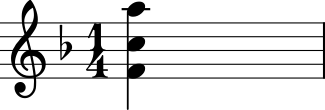

In [2]:
f = chord.Chord('F4 C5 A5')
kf = key.Key('F')
sf = stream.Measure([kf, f])
sf.show()

## Loading a Song
Assuming you have already downloaded Effendi's Whole collection to your local machine you can use music21 to open them and get a lot of information out.

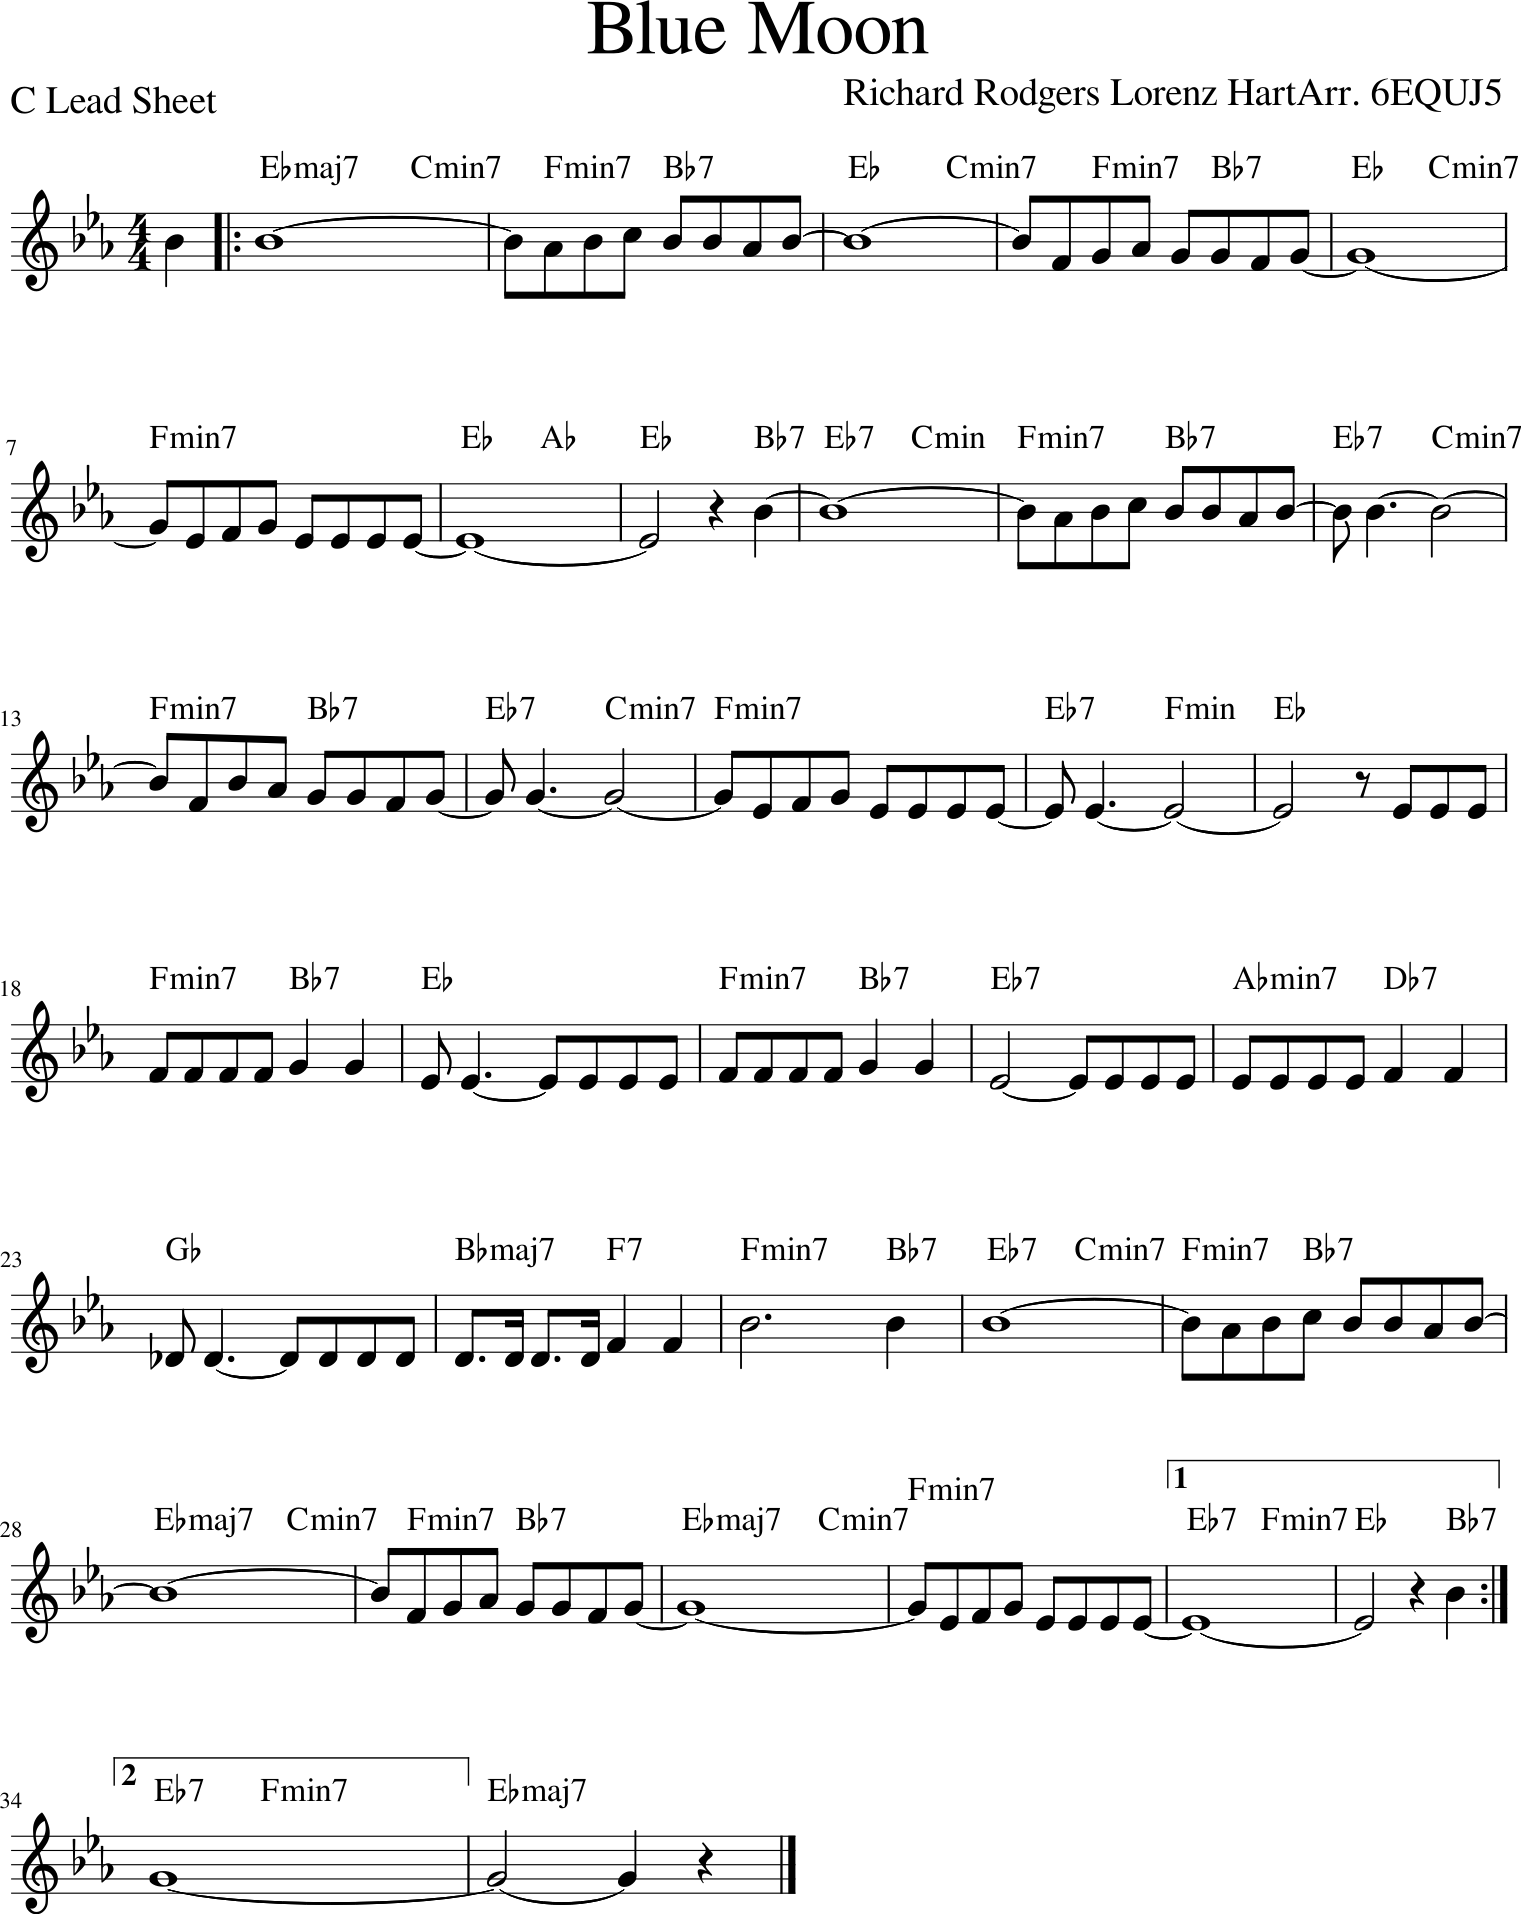

In [3]:
bm = converter.parse('../jazz/repo/II/Blue Moon.xml')
bm.show()

In [4]:
bm.analyze('key')

<music21.key.Key of E- major>

In [5]:
bm.metadata.all()

[('composer', 'Richard Rodgers Lorenz Hart\nArr. 6EQUJ5'),
 ('copyright', '©2016 Finmusic/effendi.me'),
 ('movementName', 'Blue Moon')]

In [6]:
bm.metadata.title

'Blue Moon'

In [7]:
bm.metadata.composer

'Richard Rodgers Lorenz Hart\nArr. 6EQUJ5'

/usr/local/lib/python3.10/dist-packages/music21/musicxml/m21ToXml.py:476: MusicXMLWarning: <music21.stream.Score 0x7f18f630c5e0> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


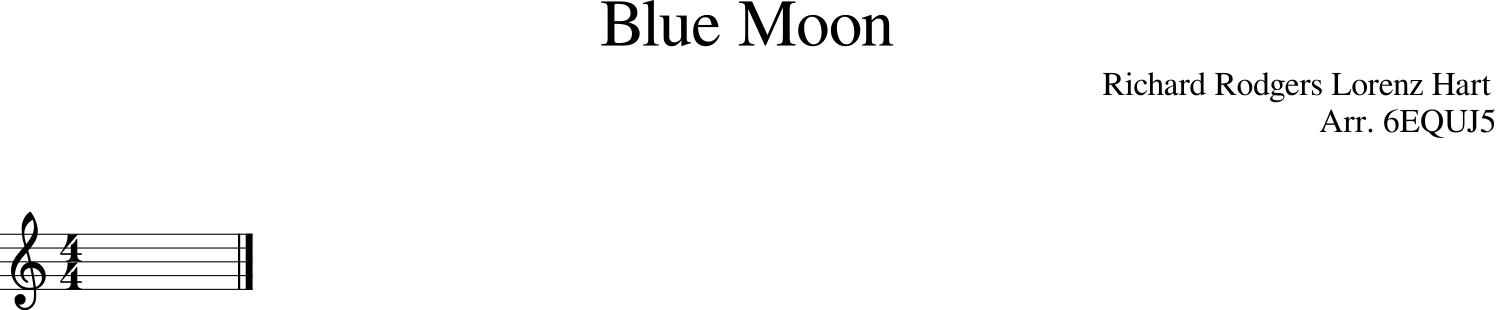

In [8]:
bm.getTimeSignatures().show()

In [9]:
m = bm.measure(1)

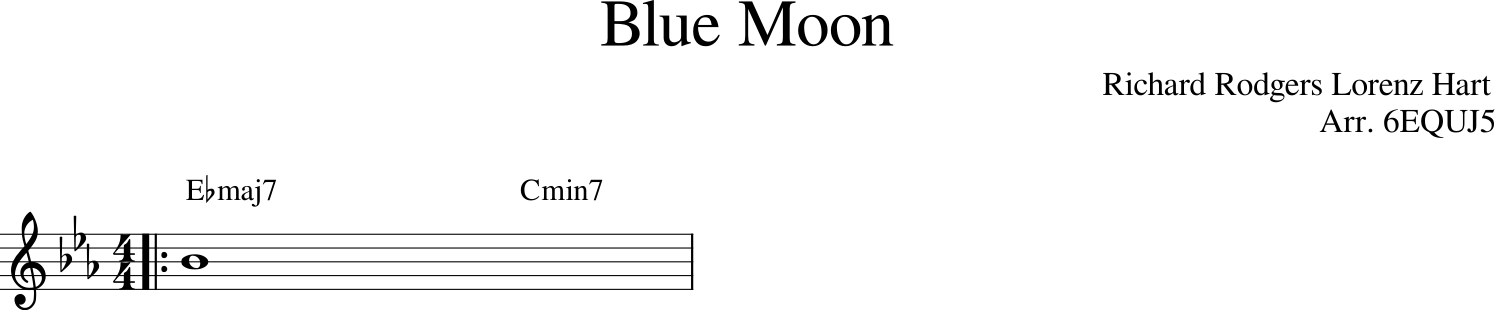

In [10]:
m.show()

However, if you want to extract the harmony, i.e. the sequence of chords, measure by measure. Music21 does not help much.

In [2]:
from musicir.leadsheets.musicxml import HarmonyParser, ChordParser, import_into_db

In [13]:
HP = HarmonyParser("../jazz/repo/II/Black Ice.xml")
HP.number_of_measures

62

In [14]:
c= HP.get_measure_chords(1)[0]

In [15]:
ChordParser(c)

B7 - dominant

In [16]:
HP.as_json()

'[{"measure": 0, "chords": []}, {"measure": 1, "chords": ["B7 - dominant"]}, {"measure": 2, "chords": ["Emin9 - minor-ninth", "Fmaj7 - major-seventh"]}, {"measure": 3, "chords": ["Emin7 - minor-seventh", "A13 - dominant-13th"]}, {"measure": 4, "chords": ["Emin7 - minor-seventh", "F6 - major-sixth"]}, {"measure": 5, "chords": ["Emin7 - minor-seventh", "A13 - dominant-13th"]}, {"measure": 6, "chords": ["A13 - dominant-13th"]}, {"measure": 7, "chords": ["Emin7 - minor-seventh", "F7 - dominant"]}, {"measure": 8, "chords": ["Emin7 - minor-seventh", "A13 - dominant-13th"]}, {"measure": 9, "chords": ["Emin7 - minor-seventh", "Fmaj7 - major-seventh"]}, {"measure": 10, "chords": ["Emin9 - minor-ninth", "A13 - dominant-13th"]}, {"measure": 11, "chords": ["Emin9 - minor-ninth", "Fmaj7 - major-seventh"]}, {"measure": 12, "chords": ["Emin9 - minor-ninth", "A13 - dominant-13th"]}, {"measure": 13, "chords": ["Emin9 - minor-ninth", "F6 - major-sixth"]}, {"measure": 14, "chords": ["Emin9 - minor-ninth"

In [17]:
for m in range(HP.number_of_measures):
    print(f'Measure {m}')
    h = HP.get_measure_chords(m)
    for c in h:
        print(Acorde(c))

Measure 0
Measure 1
B7 - dominant
Measure 2
Emin9 - minor-ninth
Fmaj7 - major-seventh
Measure 3
Emin7 - minor-seventh
A13 - dominant-13th
Measure 4
Emin7 - minor-seventh
F6 - major-sixth
Measure 5
Emin7 - minor-seventh
A13 - dominant-13th
Measure 6
A13 - dominant-13th
Measure 7
Emin7 - minor-seventh
F7 - dominant
Measure 8
Emin7 - minor-seventh
A13 - dominant-13th
Measure 9
Emin7 - minor-seventh
Fmaj7 - major-seventh
Measure 10
Emin9 - minor-ninth
A13 - dominant-13th
Measure 11
Emin9 - minor-ninth
Fmaj7 - major-seventh
Measure 12
Emin9 - minor-ninth
A13 - dominant-13th
Measure 13
Emin9 - minor-ninth
F6 - major-sixth
Measure 14
Emin9 - minor-ninth
A13 - dominant-13th
Measure 15
Emin7 - minor-seventh
Dmin9 - minor-ninth
G13 - dominant-13th
Measure 16
Cmaj7 - major-seventh
B7 - dominant
Measure 17
Dmin7 - minor-seventh
G7 - dominant
Cmaj7 - major-seventh
E♭ - major
Measure 18
B♭maj9 - major-ninth
A♭13 - dominant-13th
G7 - dominant
Measure 19
F♯min11 - minor-11th
Measure 20
C♯9 - dominant-